In [1]:
# plot learning curve of DRL/PPO
import os
import csv
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline, BSpline

def read_data(folder, file_name):
    file_path = os.path.join(folder, file_name)
    with open(file_path, 'r') as csvfile:
        reader = csv.reader(csvfile)
        data = list(reader)
    return data

def smooth(scalars, weight):  # Weight between 0 and 1
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value

    return smoothed

def plot_data(data_dict, type_name):

    fig, ax = plt.subplots()  # Create a figure and an axes.
    for name in data_dict.keys():
        ax.plot(data_dict[name], label=name)  # Plot some data on the axes.
    ax.set_xlabel('Epoch')  # Add an x-label to the axes.
    ax.set_ylabel('Average rewards per episode')  # Add a y-label to the axes.
    ax.legend()  # Add a legend.
    plt.grid()
    plt.savefig('{}.pdf'.format(name))
    plt.show()



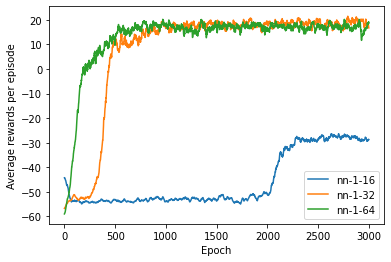

In [34]:
# plot network structures
all_data = {}
for n_layer in range(1, 2):
    for n_neuron in [16, 32, 64]:

        data = read_data('./PPO_tune_nn_relu', 'results_nn-{}-{}.csv'.format(n_layer, n_neuron))
        eps_rews = data[5][1:]
        eps_rews = [float(v) for v in eps_rews]

        eps_rews_smooth = smooth(eps_rews, 0.9)
        all_data['nn-{}-{}'.format(n_layer, n_neuron)] = eps_rews_smooth

plot_data(all_data, "network_structure")
